In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt

In [147]:
orders_df = pd.read_csv("orders.csv")

In [148]:
orders_df.head()

,y,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [149]:
users_df = pd.read_json("users.json")

In [150]:
users_df.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [151]:
conn = sqlite3.connect("restaurants.db")

In [152]:
restaurants_df = pd.read_sql("SELECT * FROM restaurants", conn)


In [153]:
restaurants_df.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [154]:
merged_df = pd.merge( orders_df, users_df,on="user_id", how="left" )


In [155]:
final_df = pd.merge( merged_df, restaurants_df,on="restaurant_id",how="left"  )


In [156]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)

In [157]:
final_df['order_date'] = pd.to_datetime(final_df['order_date'])

C:\Users\riyav\AppData\Local\Temp\ipykernel_15500\606004383.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_df['order_date'] = pd.to_datetime(final_df['order_date'])


In [158]:
final_df['month'] = final_df['order_date'].dt.month

In [159]:
final_df.head()

,y,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating,month
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2,2
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5,1
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0,7
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8,10
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0,12


In [160]:
monthly_orders = final_df.groupby('month')['y'].count()

In [161]:
monthly_orders.head()

month
1    831
2    785
3    903
4    812
5    844
Name: y, dtype: int64

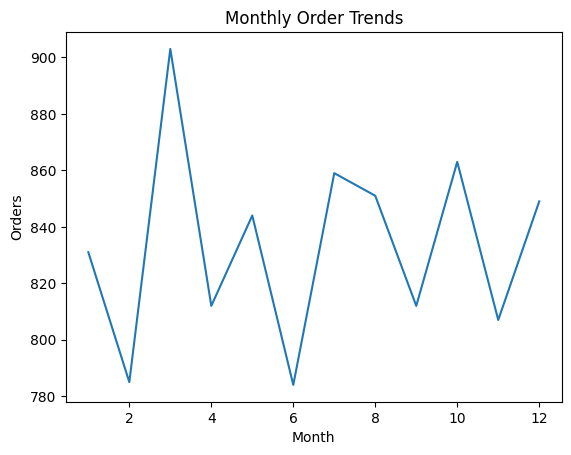

In [162]:
plt.plot(monthly_orders.index, monthly_orders.values)
plt.xlabel("Month")
plt.ylabel("Orders")
plt.title("Monthly Order Trends")
plt.show()

In [163]:
final_df.groupby('membership')['y'].count()

membership
Gold       4987
Regular    5013
Name: y, dtype: int64

In [164]:
final_df.head()

,y,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating,month
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2,2
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5,1
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0,7
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8,10
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0,12


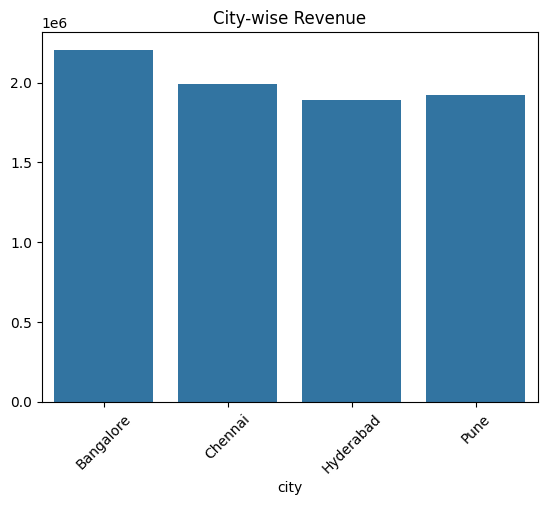

In [165]:
city_revenue = final_df.groupby('city')['total_amount'].sum()
sns.barplot(x=city_revenue.index, y=city_revenue.values)
plt.xticks(rotation=45)
plt.title("City-wise Revenue")
plt.show()

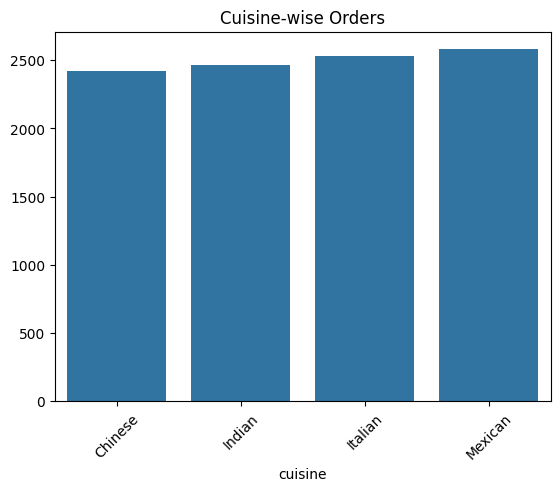

In [166]:
cuisine_orders = final_df.groupby('cuisine')['y'].count()

sns.barplot(x=cuisine_orders.index, y=cuisine_orders.values)
plt.xticks(rotation=45)
plt.title("Cuisine-wise Orders")
plt.show()

In [167]:
final_df.head()

,y,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating,month
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2,2
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5,1
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0,7
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8,10
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0,12


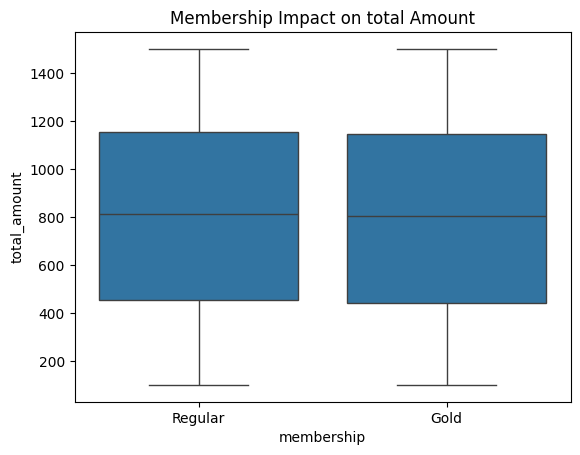

In [168]:
sns.boxplot(x='membership', y='total_amount', data=final_df)
plt.title("Membership Impact on total Amount")
plt.show()

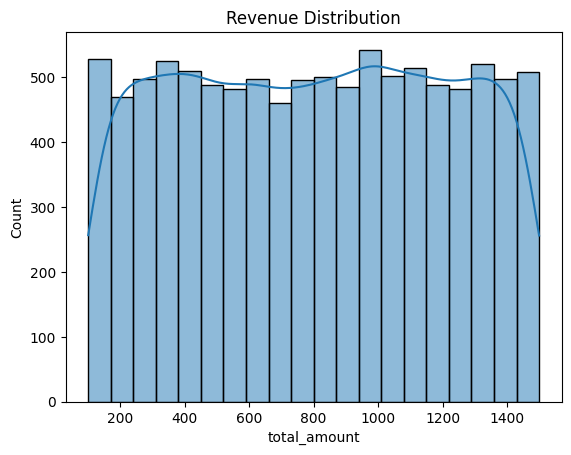

In [169]:
sns.histplot(final_df['total_amount'], bins=20, kde=True)
plt.title("Revenue Distribution")
plt.show()